In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and Treating the data

In [6]:
df = pd.read_csv("SWaT.A3_dataset_Jul_19_labelled.csv", header=1, skiprows=[2])

<ipython-input-6-2488eb7dd6dd>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SWaT.A3_dataset_Jul_19_labelled.csv", header=1, skiprows=[2])


In [7]:
df["Attack"].replace(np.nan, "benign", inplace=True)
df["Label"].replace(np.nan, 0, inplace=True)
df = df.rename(columns={"GMT +0": "Time"})
df["Time"] = df["Time"].apply(lambda x: pd.to_datetime(x).timestamp()).astype(int)

In [8]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


Replacing columns with dictionaries in strings with one column for each key in said dictionary

In [9]:
for name in df.columns:
    if len(name) >= 2 and name[0:2] == "LS":
        object_list = df[name].tolist()
        object_list = [eval(obj.replace("'", "\"")) for obj in object_list]
        for key_name in object_list[0].keys():
            values = [obj[key_name] for obj in object_list]
            df[name + "_" + key_name] = values
        df = df.drop(name, axis=1)

In [10]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 603_Value,LSL 601_IsSystem,LSL 601_Name,LSL 601_Value,LSL 602_IsSystem,LSL 602_Name,LSL 602_Value,LSL 603_IsSystem,LSL 603_Name,LSL 603_Value
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1


Removing columns with constant value

In [11]:
df = df.loc[:, (df != df.iloc[0]).any()] 

In [12]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Name,LSH 601_Value
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,142.527557,9.293002,...,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,142.527557,9.289157,...,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,142.527557,9.289157,...,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,Active,1


In [13]:
df["Label"].unique()

array([0., 1.])

We can see that the values of the Label column should be integers

In [14]:
df["Label"] = df["Label"].astype(int)

In [15]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Name,LSH 601_Value
0,1563597000,benign,0,0.0,729.8658,1,3,2,142.527557,9.293002,...,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
1,1563597001,benign,0,0.0,729.4340,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
2,1563597002,benign,0,0.0,729.1200,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
3,1563597003,benign,0,0.0,728.6882,1,3,2,142.527557,9.289157,...,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
4,1563597004,benign,0,0.0,727.7069,1,3,2,142.527557,9.289157,...,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,Active,1


One hot encoding non-numerical columns

In [16]:
df = pd.get_dummies(data=df, columns=list(df.select_dtypes(['object']).columns))

In [17]:
df.head(5)

,Time,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,AIT 203,...,FIT 601,P601 Status,LSH 601_Value,Attack_Spoofing,Attack_Switch_ON,Attack_Switch_close,Attack_Switch_off,Attack_benign,LSH 601_Name_Active,LSH 601_Name_Inactive
0,1563597000,0,0.0,729.8658,1,3,2,142.527557,9.293002,198.077423,...,0.00032,1,1,0,0,0,0,1,1,0
1,1563597001,0,0.0,729.4340,1,3,2,142.527557,9.293002,198.385025,...,0.00032,1,1,0,0,0,0,1,1,0
2,1563597002,0,0.0,729.1200,1,3,2,142.527557,9.293002,198.436300,...,0.00032,1,1,0,0,0,0,1,1,0
3,1563597003,0,0.0,728.6882,1,3,2,142.527557,9.289157,198.667000,...,0.00032,1,1,0,0,0,0,1,1,0
4,1563597004,0,0.0,727.7069,1,3,2,142.527557,9.289157,198.897720,...,0.00032,1,1,0,0,0,0,1,1,0


# Visualisation

Check the correlation values on the dataset.

[Text(0.5, 0, 'Time'),
 Text(3.5, 0, 'LIT 101'),
 Text(6.5, 0, 'P101 Status'),
 Text(9.5, 0, 'AIT 203'),
 Text(12.5, 0, 'P203 Status'),
 Text(15.5, 0, 'AIT 302'),
 Text(18.5, 0, 'FIT 301'),
 Text(21.5, 0, 'MV 302'),
 Text(24.5, 0, 'P3_STATE'),
 Text(27.5, 0, 'FIT 401'),
 Text(30.5, 0, 'UV401'),
 Text(33.5, 0, 'AIT 503'),
 Text(36.5, 0, 'FIT 502'),
 Text(39.5, 0, 'MV 501'),
 Text(42.5, 0, 'PIT 503'),
 Text(45.5, 0, 'LSH 601_Value'),
 Text(48.5, 0, 'Attack_Switch_close'),
 Text(51.5, 0, 'LSH 601_Name_Active')]

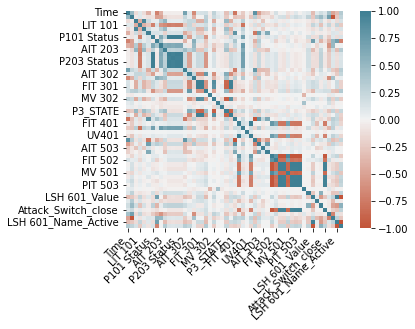

In [26]:
import seaborn as sns

df_numerical = df.select_dtypes(include=['number'])

corr = df_numerical.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Outlier detection

In [18]:
from sklearn.ensemble import IsolationForest

df_no_label = df.drop(["Label", "Attack_Spoofing", "Attack_Switch_ON", "Attack_Switch_close", "Attack_Switch_off", "Attack_benign"], axis=1)

contamination = len(df[(df["Label"] != 0)]) / len(df)


predictor = IsolationForest(contamination = contamination, random_state = 42)
predictor.fit(df_no_label)
outliers = predictor.predict(df_no_label)

print(f"Number of outliers found: {sum(outliers == -1)}")
df_no_label["outliers"] = outliers
correct_outliers = len(df[df["Label"] == 1][df_no_label["outliers"] == -1])
print(f"Correctly identified outliers: {correct_outliers}")

/home/yoku/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers found: 2553
Correctly identified outliers: 883


<ipython-input-18-60f932abbfa0>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_outliers = len(df[df["Label"] == 1][df_no_label["outliers"] == -1])


In [19]:
from sklearn.neighbors import LocalOutlierFactor


predictor = LocalOutlierFactor(contamination = contamination)
outliers = predictor.fit_predict(df_no_label)

print(f"Number of outliers found: {sum(outliers == -1)}")
df_no_label["lof_outliers"] = outliers
correct_outliers = len(df[df["Label"] == 1][df_no_label["lof_outliers"] == -1])
print(f"Correctly identified outliers: {correct_outliers}")

Number of outliers found: 2553
Correctly identified outliers: 491


<ipython-input-19-3abcbefda7d9>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_outliers = len(df[df["Label"] == 1][df_no_label["lof_outliers"] == -1])


In [20]:
def show3D_data_fraud(df, df_no_label, x_axis_name, y_axis_name, z_axis_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
    
    df_fraud = df[df["Label"] == 1]
    df_no_fraud = df[df["Label"] == 0]
    
    df_no_label_iso_f = df_no_label[df_no_label["outliers"] == -1]
    df_no_label_iso_no_f = df_no_label[df_no_label["outliers"] == 1]
    
    df_no_label_lof_f = df_no_label[df_no_label["lof_outliers"] == -1]
    df_no_label_lof_no_f = df_no_label[df_no_label["lof_outliers"] == 1]
    
    axes[0, 1].scatter(df_fraud[x_axis_name], df_fraud[y_axis_name], df_fraud[z_axis_name], c="red", label="Fraud")
    axes[0, 1].scatter(df_no_fraud[x_axis_name], df_no_fraud[y_axis_name], df_no_fraud[z_axis_name], c="green", label="Not Fraud")
    axes[0, 1].set_title("Real outliers")
    
    axes[0, 0].scatter(df[x_axis_name], df[y_axis_name], df[z_axis_name], c="blue", label="All")
    axes[0, 0].set_title("All")
    
    axes[1, 0].scatter(df_no_label_iso_f[x_axis_name], df_no_label_iso_f[y_axis_name], df_no_label_iso_f[z_axis_name], c="red", label="Fraud")
    axes[1, 0].scatter(df_no_label_iso_no_f[x_axis_name], df_no_label_iso_no_f[y_axis_name], df_no_label_iso_no_f[z_axis_name], c="green", label="Not Fraud")
    axes[1, 0].set_title("Isolation Forest")
    
    axes[1, 1].scatter(df_no_label_lof_f[x_axis_name], df_no_label_lof_f[y_axis_name], df_no_label_lof_f[z_axis_name], c="red", label="Fraud")
    axes[1, 1].scatter(df_no_label_lof_no_f[x_axis_name], df_no_label_lof_no_f[y_axis_name], df_no_label_lof_no_f[z_axis_name], c="green", label="Not Fraud")
    axes[1, 1].set_title("LOF")
    
    
    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            ax.set_xlabel(x_axis_name)
            ax.set_ylabel(y_axis_name)
            ax.set_zlabel(z_axis_name)
            ax.legend(loc='best')
    
    
    plt.show()

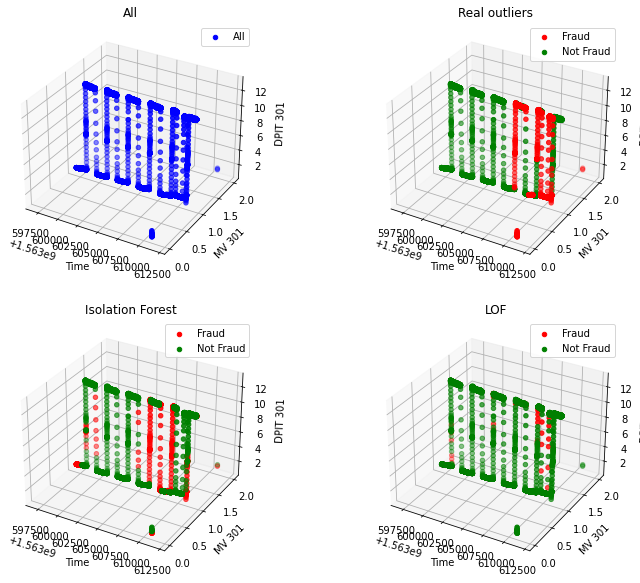

In [21]:
show3D_data_fraud(df, df_no_label, 'Time', 'MV 301','DPIT 301')

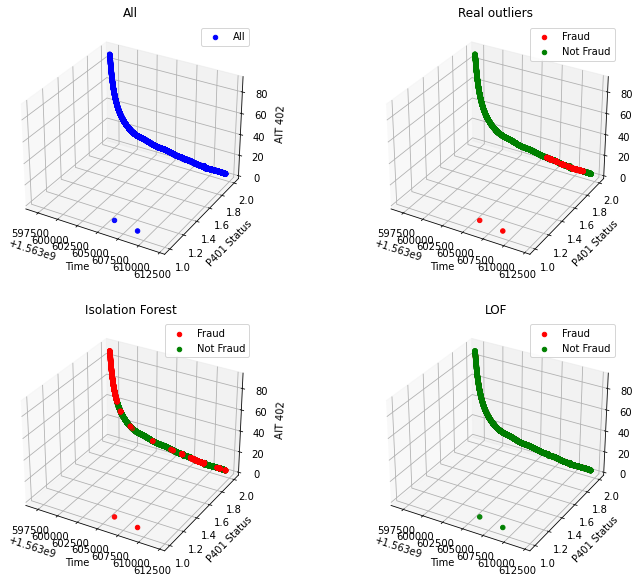

In [22]:
show3D_data_fraud(df, df_no_label, 'Time', 'P401 Status','AIT 402')

## LSTM 

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
df_numerical = df.select_dtypes(include=['number'])

# Divisez le DataFrame en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df_numerical, test_size=0.2, random_state=42)

# Les ensembles d'entraînement et de test contiennent toutes les colonnes, y compris les caractéristiques et le label
X_train = train_df.drop("Label", axis=1)
y_train = train_df["Label"]

X_test = test_df.drop("Label", axis=1)
y_test = test_df["Label"]

In [44]:
# Construction du modèle LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [45]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
loss = model.evaluate(X_test, y_test)
print(f'Loss on test data: {loss}')

# Faire des prédictions
predictions = model.predict(X_test)

Epoch 1/50
375/375 [==============================] - 10s 19ms/step - loss: 0.1191 - accuracy: 0.8456 - val_loss: 0.0832 - val_accuracy: 0.8850
Epoch 2/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0730 - accuracy: 0.8965 - val_loss: 0.0709 - val_accuracy: 0.9030
Epoch 3/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0669 - accuracy: 0.9053 - val_loss: 0.0640 - val_accuracy: 0.9013
Epoch 4/50
375/375 [==============================] - 7s 17ms/step - loss: 0.0609 - accuracy: 0.9068 - val_loss: 0.0575 - val_accuracy: 0.9077
Epoch 5/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0576 - accuracy: 0.9089 - val_loss: 0.0530 - val_accuracy: 0.9080
Epoch 6/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0532 - accuracy: 0.9120 - val_loss: 0.0518 - val_accuracy: 0.9140
Epoch 7/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0505 - accuracy: 0.9135 - val_loss: 0.0476 - val_accuracy: 0.911

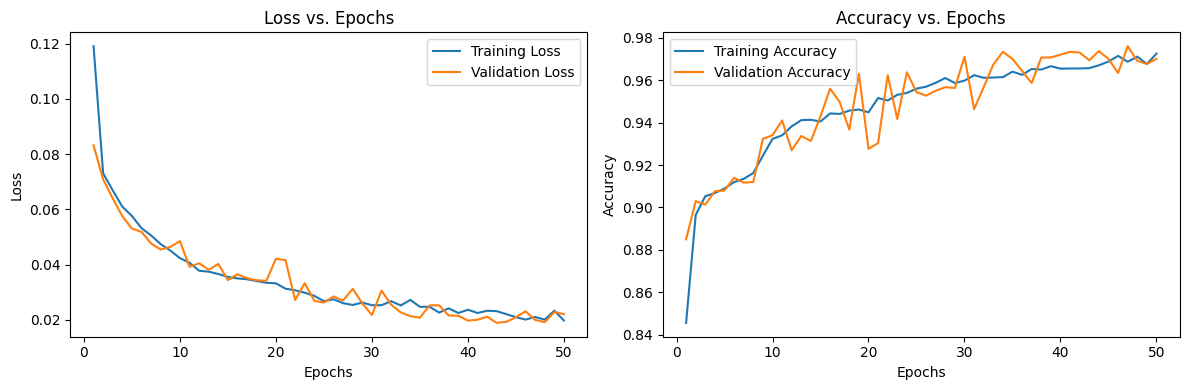

In [46]:
# Extraire les données d'entraînement
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tracer la courbe de la perte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Multiclass classification

In [27]:
df_numerical["Attack_Switch_ON"] = df_numerical["Attack_Switch_ON"].map({0: 0, 1: 2})
df_numerical["Attack_Switch_close"] = df_numerical["Attack_Switch_close"].map({0: 0, 1: 3})
df_numerical["Attack_Switch_off"] = df_numerical["Attack_Switch_off"].map({0: 0, 1: 4})

In [28]:
def get_label(row):
  return max(row["Attack_Spoofing"],row["Attack_Switch_ON"], row["Attack_Switch_close"], row["Attack_Switch_off"])

df_numerical["Label"] = df_numerical.apply(get_label, axis=1)

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.inspection import permutation_importance


df_no_label = df_numerical.drop(["Attack_Spoofing", "Attack_Switch_ON", "Attack_Switch_close", "Attack_Switch_off", "Attack_benign"], axis=1)

train_df, test_df = train_test_split(df_no_label, test_size=0.2, random_state=42)

X_train = train_df.drop("Label", axis=1)
y_train = train_df["Label"]

X_test = test_df.drop("Label", axis=1)
y_test = test_df["Label"]


feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

def get_metrics(clf):
  y_pred = clf.predict(X_test)
  acc = clf.score(X_test, y_test)
  (precision, recall, f_score, support) = precision_recall_fscore_support(y_test, y_pred, average="macro")
  print(f"Metrics : Accuracy = {acc}, precision = {precision}, recall = {recall}, f_score = {f_score}")

def get_feature_importance(clf):
  result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42
    )
  forest_importances = pd.Series(result.importances_mean, index=feature_names)
  fig, ax = plt.subplots(figsize=(8, 6))
  forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
  ax.set_title(f"Feature importances on the {clf.__class__.__name__}")
  ax.set_ylabel("Mean accuracy decrease")
  important_feature = X_train.columns[result.importances_mean.argmax()]
  fig.suptitle(f'The classifier is focused on {important_feature}', fontsize=14, fontweight='bold')
  fig.tight_layout()
  plt.show()

In [ ]:
mlp_clf = MLPClassifier(random_state=42, early_stopping=True).fit(X_train, y_train)
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
dtc_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
gb_clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [37]:
get_metrics(mlp_clf)

Metrics : Accuracy = 0.8386666666666667, precision = 0.16773333333333335, recall = 0.2, f_score = 0.1824510514865845


/home/yoku/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
get_metrics(rf_clf)

Metrics : Accuracy = 1.0, precision = 1.0, recall = 1.0, f_score = 1.0


In [40]:
get_metrics(dtc_clf)

Metrics : Accuracy = 0.9996666666666667, precision = 0.9999205403257847, recall = 0.9925925925925926, f_score = 0.9961866773633641


In [41]:
get_metrics(gb_clf)

Metrics : Accuracy = 0.9996666666666667, precision = 0.9999205403257847, recall = 0.9925925925925926, f_score = 0.9961866773633641


Let's perform feature importance on RandomForestClassifier and DecisionTreeClassifier since they got near 100% accuracy.

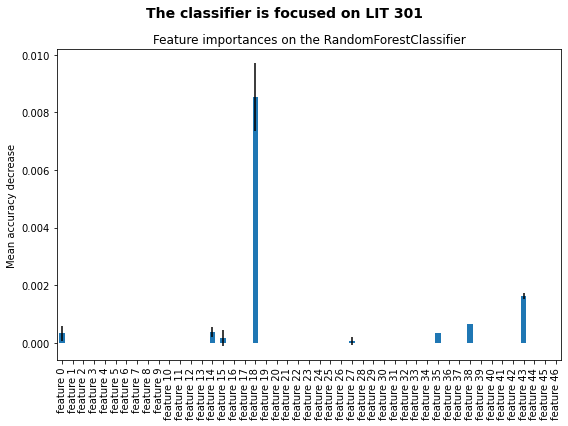

In [42]:
get_feature_importance(rf_clf)

LIT 301 seems to be the only important value to monitor here for the classifier to achieve perfect accuracy.
Let's compare with the DecisionTreeClassifier to check if both models found the same feature importance.

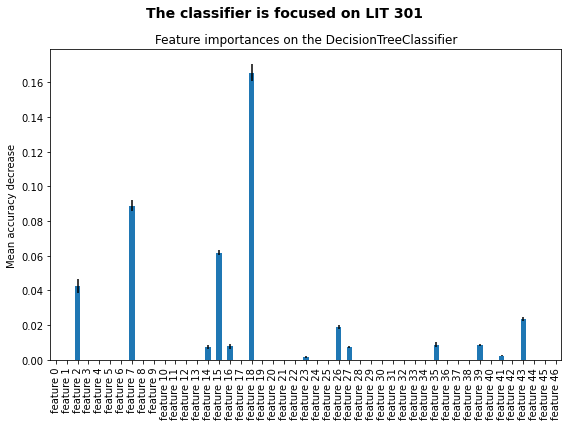

In [43]:
get_feature_importance(dtc_clf)

Finally, let's compare with the XGBoostClassifier.

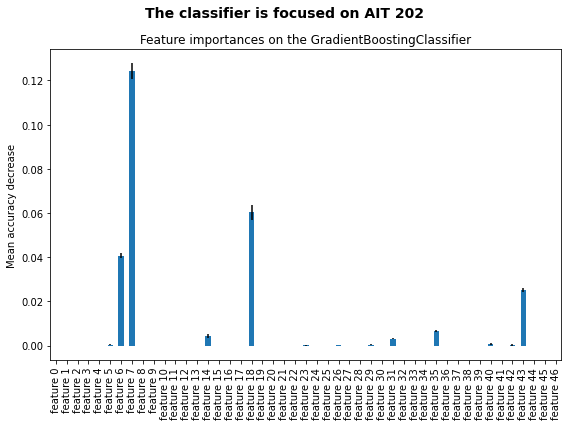

In [45]:
get_feature_importance(gb_clf)

Interestingly, XGBoost is focused elsewhere but gets the same metrics as the other two.